## Elektabilitas Caleg Dengan Decision Tree

In [11]:
import pandas as pd

df = pd.read_excel('datapemilukpu.xls')

df

,NAMA PARTAI POLITIK,NAMA CALON LEGESLATIF,JENIS KELAMIN,KECAMATAN,NO.URUT PARPOL,SUARA SAH PARTAI,JUML.PEROLEHAN KURSI,DAERAH PEMILIHAN,NO.URUT CALEG,SUARA SAH CALEG,TERPILIH ATAU TIDAK
0,HATI NURANI RAKYAT,"TOTO SUKISNO,BSc",L,LEBAKSIU,1,18578,1,1,1,594,TIDAK
1,HATI NURANI RAKYAT,"EDI PURYANTO,SH",L,SLAWI,1,18578,1,1,2,943,TIDAK
2,HATI NURANI RAKYAT,"ELI RETNOWATI,SH",P,SLAWI,1,18578,1,1,3,1730,TIDAK
3,HATI NURANI RAKYAT,SAHYUDIN,L,DUKUHWARU,1,18578,1,1,4,2508,YA
4,HATI NURANI RAKYAT,"H.FAJAR SIGIT KUSUMAJAYA,SH",L,SLAWI,1,18578,1,2,1,923,TIDAK
...,...,...,...,...,...,...,...,...,...,...,...
420,PARTAI BURUH,YUDA KURNIAWAN,L,KRAMAT,44,11003,1,6,4,402,TIDAK
421,PARTAI BURUH,WAHYUDIN,L,KRAMAT,44,11003,1,6,5,3065,TIDAK
422,PARTAI BURUH,SITI JURIYAH,P,KRAMAT,44,11003,1,6,6,72,TIDAK
423,PARTAI BURUH,MOHAMAD SOLIKHUN,L,KRAMAT,44,11003,1,6,7,52,TIDAK


In [12]:
df.describe()

,NO.URUT PARPOL,SUARA SAH PARTAI,JUML.PEROLEHAN KURSI,DAERAH PEMILIHAN,SUARA SAH CALEG
count,425.000000,425.000000,425.000000,425.000000,425.000000
mean,18.072941,52636.075294,4.604706,3.564706,1063.416471
std,11.030697,46355.354460,4.244194,1.715956,1355.611203
min,1.000000,56.000000,0.000000,1.000000,0.000000
25%,8.000000,14308.000000,0.000000,2.000000,186.000000
50%,16.000000,48136.000000,5.000000,4.000000,510.000000
75%,28.000000,58683.000000,6.000000,5.000000,1531.000000
max,44.000000,143817.000000,13.000000,6.000000,9925.000000


In [13]:
df = df.rename(columns = {
    'SUARA SAH PARTAI' : 'suara_sah_partai',	
    'SUARA SAH CALEG'	: 'suara_sah_caleg',
    'TERPILIH ATAU TIDAK' : 'terpilih_atau_tidak'
})

In [14]:
X = df[['suara_sah_partai', 'suara_sah_caleg']]
y = df['terpilih_atau_tidak']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

In [16]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()

tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
from sklearn.preprocessing import StandardScaler

acc = tree_model.score(X_test, y_test)
print('Model Accuracy : ', acc)

Model Accuracy :  0.9439252336448598


In [21]:
tree_model.predict([[1800,1500]])

array(['TIDAK'], dtype=object)

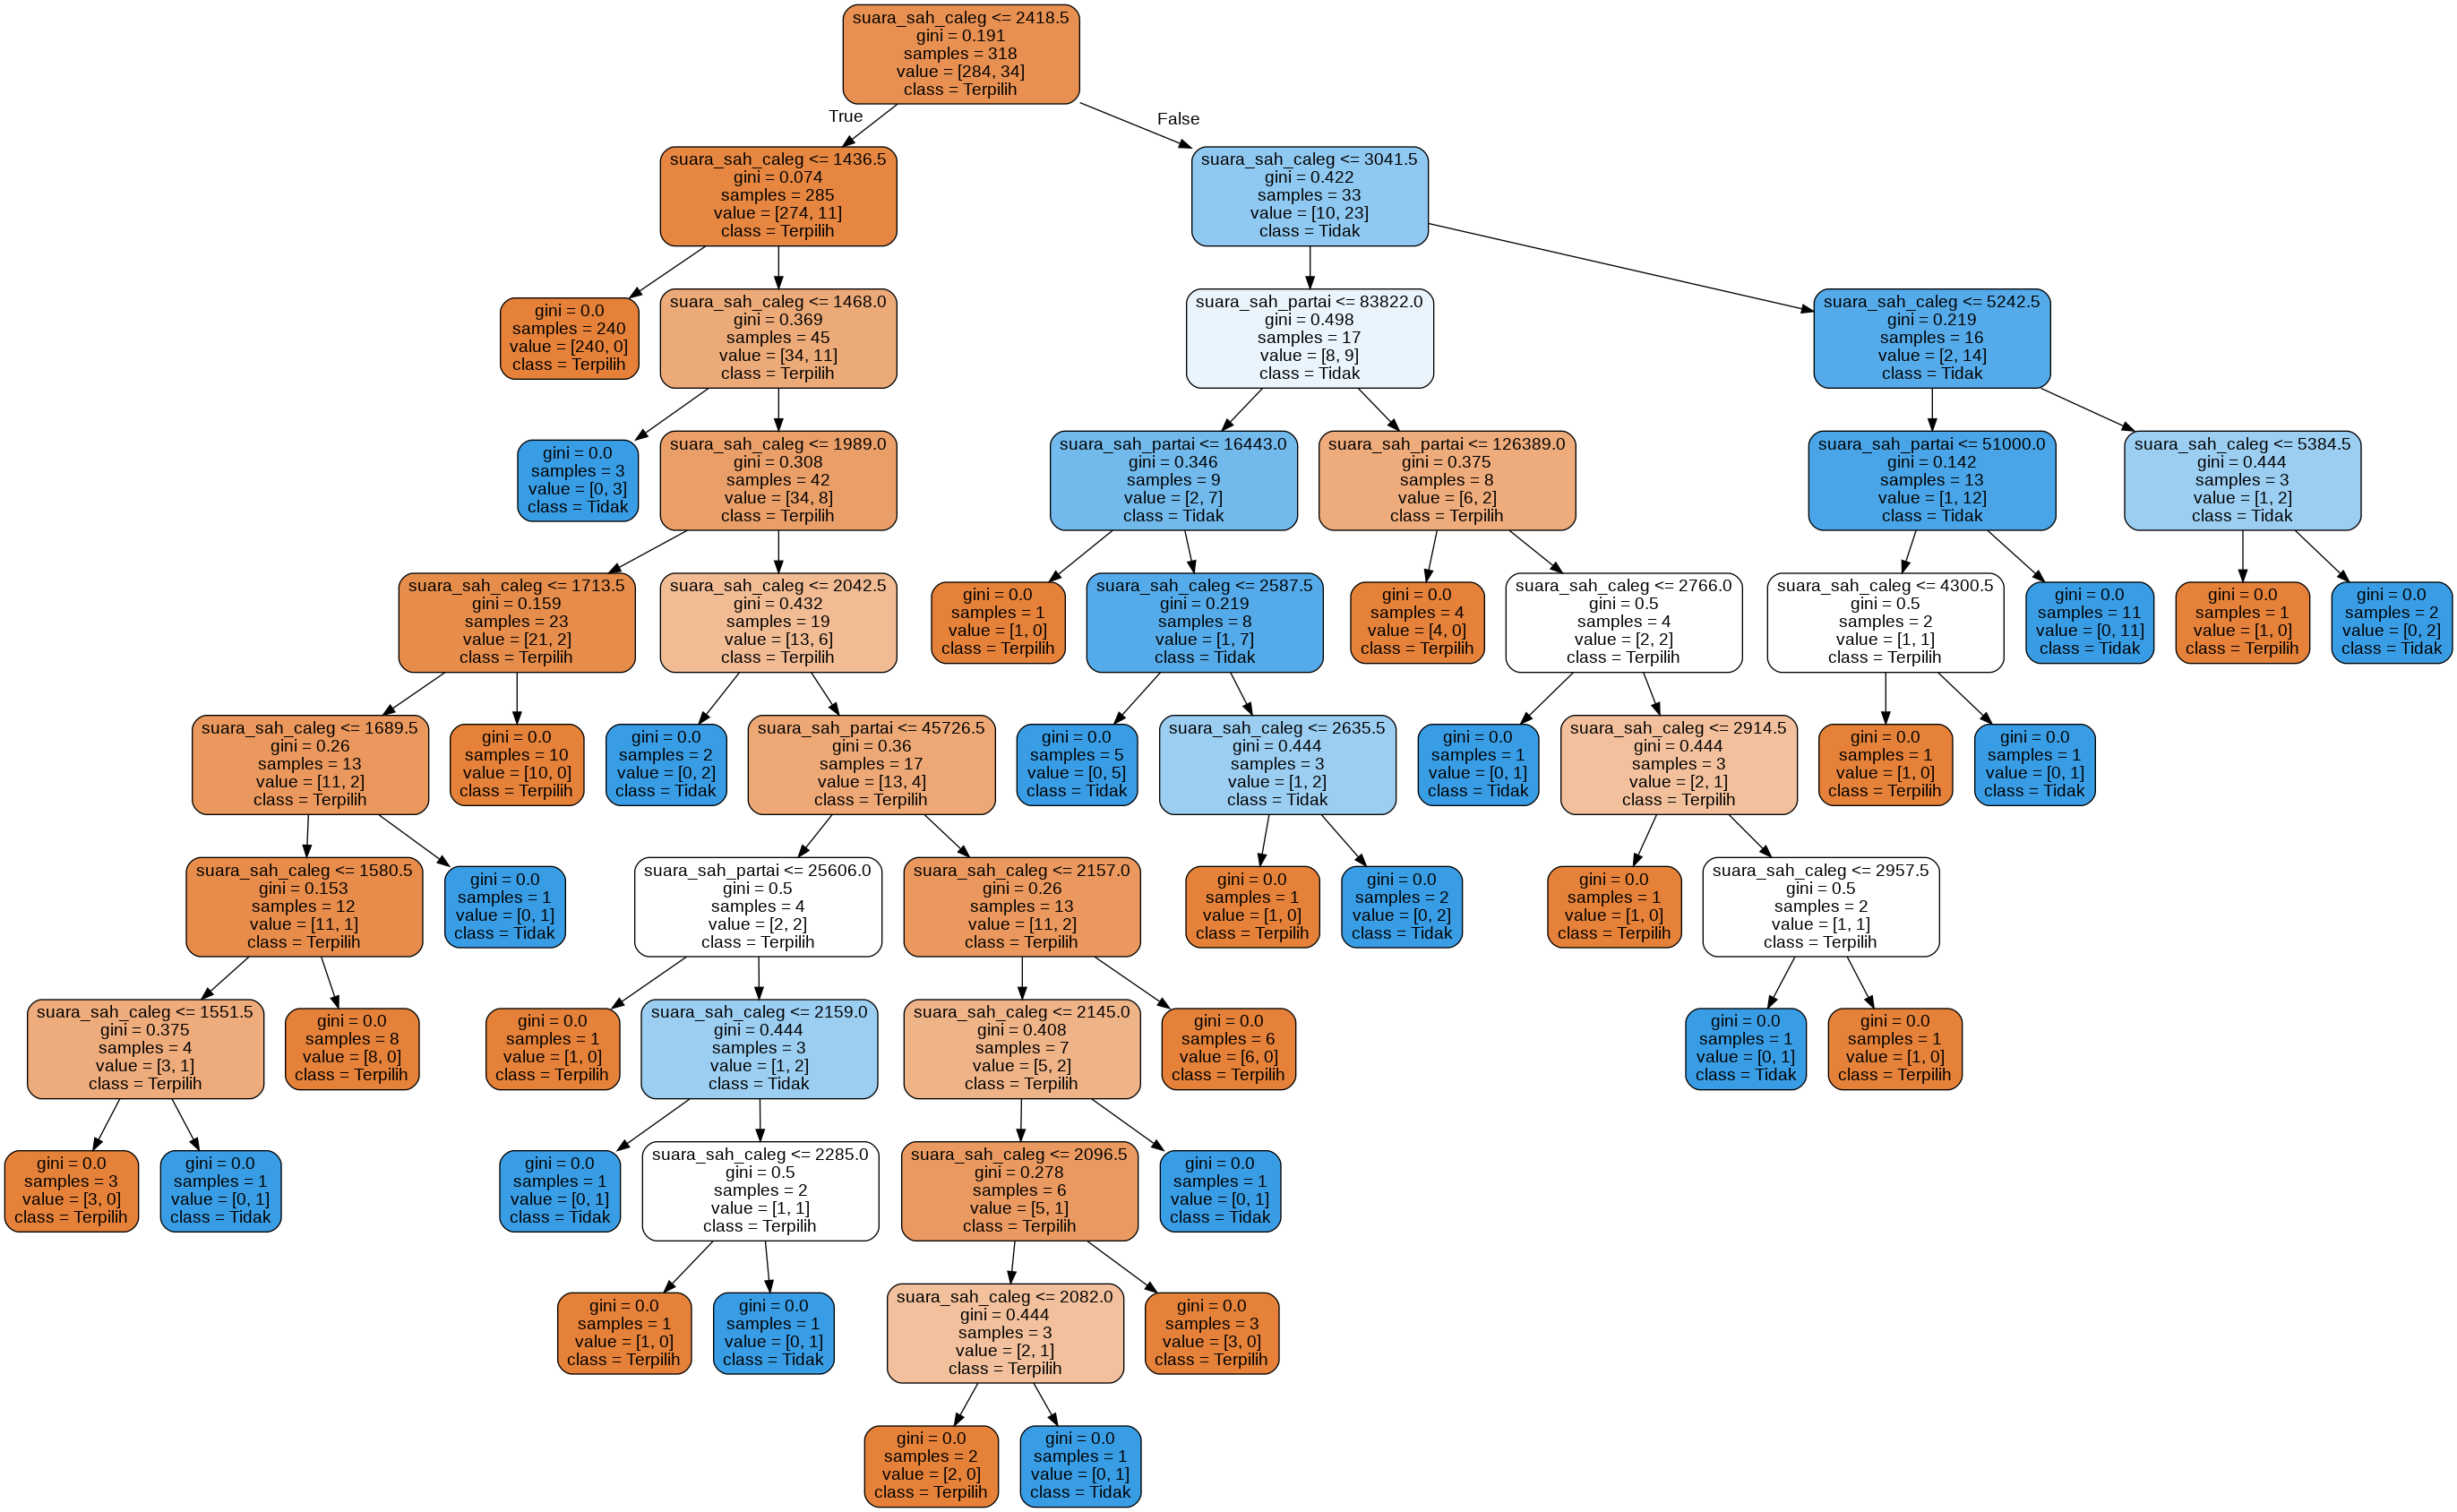

In [22]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(
    tree_model,
    out_file = None,
    feature_names = list(X.columns.values),
    class_names = ['Terpilih', 'Tidak'],
    rounded = True,
    filled = True
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())